# Домашнее задание №1: Теорема Байеса и линейная регрессия: что делать с коронавирусом?

## Часть 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.linear_model import LinearRegression

sns.color_palette("husl", 9)
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 5)

In [2]:
df = pd.read_csv('wid-covid-data.csv')

In [3]:
df.date = pd.to_datetime(df.date)
df = df[(df.location == "Russia") & (df.date >= datetime.datetime(2020, 3, 3))]
df.loc[df.new_cases==0, 'new_cases'] = 1
df.index = df.date
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-03-03,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2020-03-04,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2020-03-05,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2020-03-06,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2020-03-07,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7.310000e+02,731.000000,731.000000,715.000000,715.000000,709.000000,731.000000,731.000000,731.000000,715.000000,...,7.310000e+02,7.310000e+02,0.0,7.310000e+02,7.310000e+02,7.310000e+02,2.200000e+01,22.000000,22.000000,22.000000
mean,4.501774e+06,22497.679891,22090.214001,113659.777622,485.268531,486.147282,30852.660005,154.186570,151.394071,778.961024,...,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01,4.284770e+05,17.353182,34.286364,2936.543283
std,3.809398e+06,31341.869024,30771.638347,104790.052601,330.063954,327.938193,26107.502092,214.799812,210.891741,718.172846,...,1.813125e-13,2.773014e-13,NaN,1.066544e-13,1.194529e-12,7.776882e-16,3.350786e+05,9.596556,23.348472,2296.442529
min,3.000000e+00,1.000000,0.143000,1.000000,0.000000,0.286000,0.021000,0.000000,0.001000,0.007000,...,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01,-2.714800e+03,-0.580000,-0.590000,-18.605732
25%,9.995185e+05,8200.000000,8453.143000,18545.000000,173.000000,163.143000,6850.145000,56.198500,57.933000,127.097000,...,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01,1.104649e+05,8.985000,16.427500,757.065103
50%,4.230707e+06,15760.000000,15694.429000,89224.000000,432.000000,422.857000,28994.917000,108.010000,107.561000,611.492000,...,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01,4.441051e+05,21.530000,27.885000,3043.649481
75%,6.847948e+06,24332.000000,24131.000000,184284.000000,767.000000,763.143000,46932.031000,166.758000,165.380500,1262.980000,...,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01,6.353289e+05,23.112500,49.505000,4354.191425
max,1.644580e+07,202211.000000,188712.429000,346967.000000,1222.000000,1217.571000,112710.398000,1385.842000,1293.330000,2377.919000,...,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01,1.080748e+06,30.850000,87.850000,7406.847532


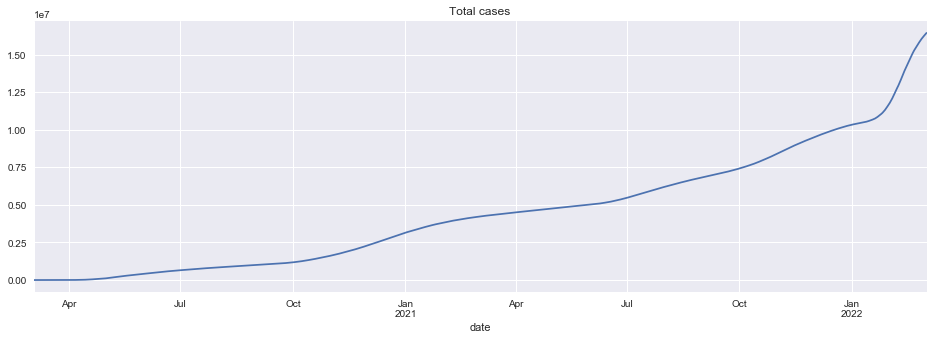

In [5]:
df['total_cases'].plot(use_index=True, title="Total cases")

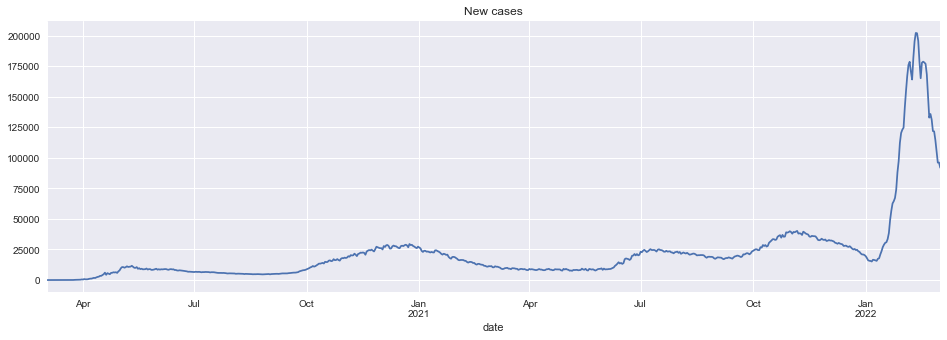

In [6]:
df.new_cases.plot(use_index=True, title="New cases")

## Часть 2

a) Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [92]:
#добавим данные для анализа
df['day_n'] = np.arange(1, df.shape[0] + 1)
df['total_log'] = np.log(df['total_cases'])
df['new_log'] = np.log(df['new_cases'])
train_size = 50

# выделяем на train первые 50 дней, остальное в test 
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()
y_total_train, y_total_test = df['total_log'].iloc[:train_size].copy(), df['total_log'].iloc[train_size:].copy()
y_new_train, y_new_test = df['new_log'].iloc[:train_size].copy(), df['new_log'].iloc[train_size:].copy()

x_train = np.arange(1, train_size + 1)[:, np.newaxis]
x_test = np.arange(train_size + 1, train_size + 1 + len(test))[:, np.newaxis]

In [8]:
# Обучаем модели log(y) = w_0 + w_1*x
model_total = LinearRegression().fit(x_train, y_total_train)
model_new = LinearRegression().fit(x_train, y_new_train)

# Делаем предсказание:
#Total cases
y_pred_total_train = model_total.predict(x_train)
y_pred_total_test = model_total.predict(x_test)

#New cases
y_pred_new_train = model_new.predict(x_train)
y_pred_new_test = model_new.predict(x_test)

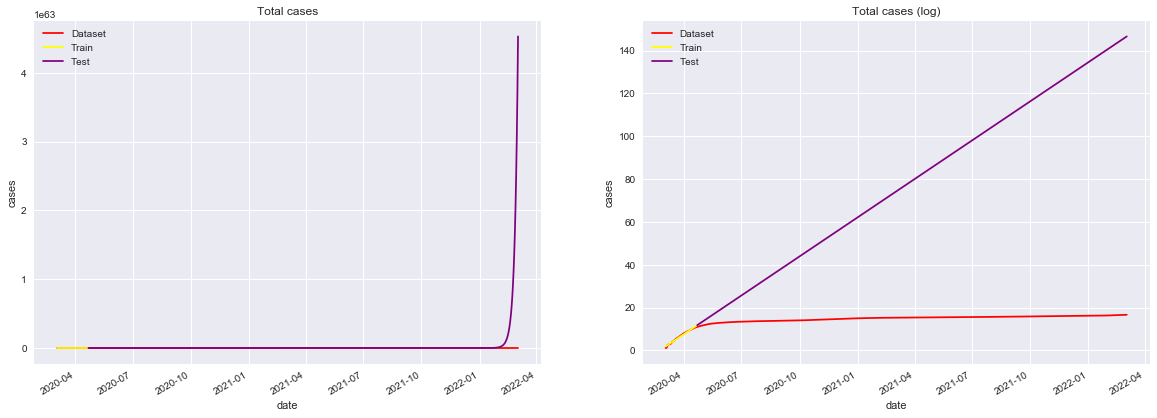

In [9]:
fig = plt.subplots(1, 2, figsize=(20, 7))
ax = plt.subplot(121)
plt.plot(df.index, df.total_cases, color = "red", label = 'Dataset')
plt.plot(df.iloc[:train_size].index, np.exp(y_pred_total_train), color = "yellow", label = 'Train')
plt.plot(df.iloc[train_size:].index, np.exp(y_pred_total_test), color = "purple", label = 'Test')

ax.set_xlabel("date")
ax.set_ylabel("cases")
ax.set_title("Total cases")
plt.xticks(rotation=45)
ax.legend(facecolor = 'white')

ax = plt.subplot(122)
ax.plot(df.index, np.log(df.total_cases), color = "red", label = 'Dataset')
ax.plot(df.iloc[:train_size].index, y_pred_total_train, color = "yellow", label = 'Train')
ax.plot(df.iloc[train_size:].index, y_pred_total_test, color = "purple", label = 'Test')

ax.set_xlabel("date")
ax.set_ylabel("cases")
ax.set_title("Total cases (log)")
plt.xticks(rotation=45)
ax.legend(facecolor = 'white')
fig[0].autofmt_xdate()
plt.show()

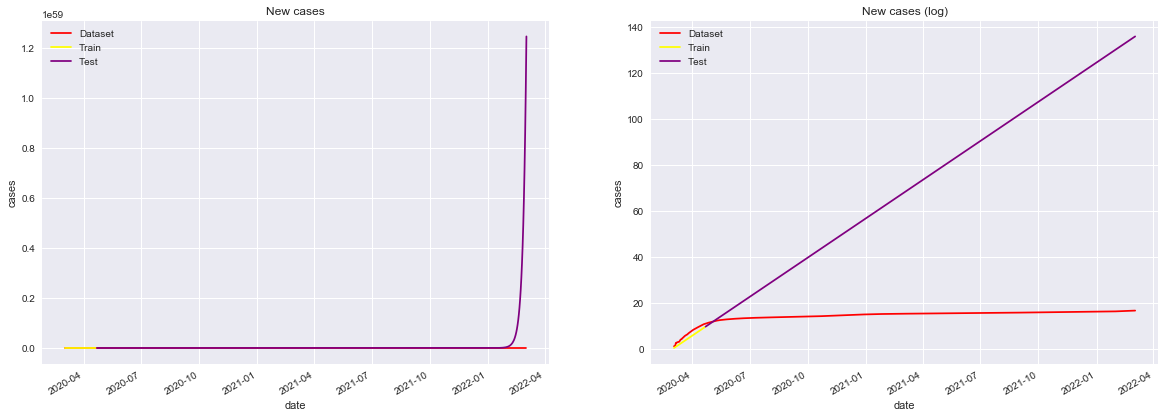

In [10]:
fig = plt.subplots(1, 2, figsize=(20, 7))
ax = plt.subplot(121)
plt.plot(df.index, df.total_cases, color = "red", label = 'Dataset')
plt.plot(df.iloc[:train_size].index, np.exp(y_pred_new_train), color = "yellow", label = 'Train')
plt.plot(df.iloc[train_size:].index, np.exp(y_pred_new_test), color = "purple", label = 'Test')

ax.set_xlabel("date")
ax.set_ylabel("cases")
ax.set_title("New cases")
plt.xticks(rotation=45)
ax.legend(facecolor = 'white')

ax = plt.subplot(122)
ax.plot(df.index, np.log(df.total_cases), color = "red", label = 'Dataset')
ax.plot(df.iloc[:train_size].index, y_pred_new_train, color = "yellow", label = 'Train')
ax.plot(df.iloc[train_size:].index, y_pred_new_test, color = "purple", label = 'Test')

ax.set_xlabel("date")
ax.set_ylabel("cases")
ax.set_title("New cases (log)")
plt.xticks(rotation=45)
ax.legend(facecolor = 'white')
fig[0].autofmt_xdate()
plt.show()

b) Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [39]:
def bayesian_update(mu_0, sigma_0, X, y, noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma_0) + noise * np.matmul(np.transpose(X), X))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma_0), np.transpose(mu_0)) + noise * np.matmul(np.transpose(X), np.array(y)))
    return mu_n, sigma_n


In [41]:
def calculate_aposterior(x, y, sigma_noise):
    x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    mu_0 = np.zeros(x.shape[1])
    sigma_0 = 5 * np.eye(x.shape[1])
    
    cur_noise = sigma_noise
    prev_noise = cur_noise
    
    while True:
        mu_n, sigma_n = bayesian_update(mu_0, sigma_0, x, y, cur_noise)
        predictions = np.matmul(x, mu_n)
        cur_noise = 1 / np.var(y - predictions)

        if abs(cur_noise - prev_noise) < 1.e-8:
            break
        else:
            prev_noise = cur_noise

    return mu_n, sigma_n

In [44]:
noise = 1 / np.var(train['total_log'].values - model_total.predict(x_train))
cur_mu, cur_sigma = calculate_aposterior(x_train, train['total_log'].values, noise)
cur_mu, cur_sigma

(array([1.61920511, 0.19838707]),
 array([[ 1.00247985e-02, -2.97766123e-04],
        [-2.97766123e-04,  1.16827935e-05]]))

c) Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [87]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    my_s = np.linspace(0, 49, 100) 
    my_y = []
    
    fig = plt.figure(figsize=(16, 5))
    for w in my_w:
        my_y.append(np.exp(w[0] + w[1]*xs))
        plt.plot(xs, my_y[-1], 'k-', lw=.4)
    plt.ylim((0, 100000))

    plt.plot(xs, np.percentile(np.array(my_y), 90, axis=0), color='green', lw=3, label='Pessimistic (90)')
    plt.plot(xs, np.percentile(np.array(my_y), 10, axis=0), color='red', lw=3, label='Optimistic(10)')
    plt.plot(x_train, train.total_cases, 'yellow', lw=3, label = 'Real data')
    plt.xlabel("Дни")
    plt.ylabel("Число заболевших")
    plt.title("Прогноз случаев заражения")
    plt.legend();

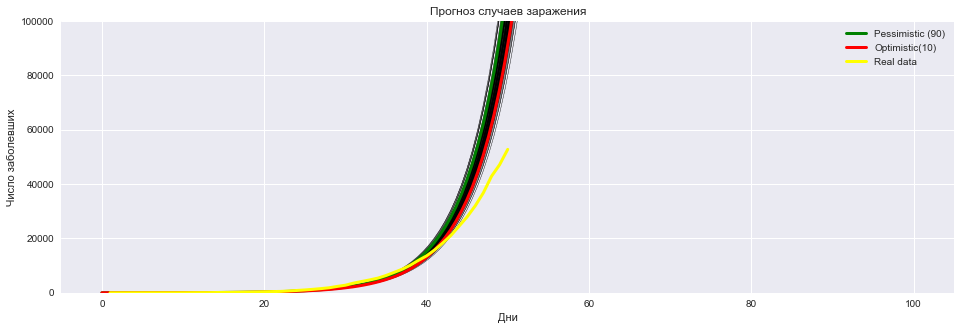

In [88]:
myplot_sample_lines(cur_mu, cur_sigma, n=100, points=None)

Предсказание к 1 мая 2022

In [117]:
start_data = datetime.datetime(2020, 3, 3)
cur_data = datetime.datetime(2022, 5, 1)
idx =  int((cur_data - start_data).days)
print(f"Предсказанное количество случаев заражения {np.exp(model_total.predict([[idx]]))[0]}")

Предсказанное количество случаев заражения 4.473583413040914e+68


Предсказание к 1 июня 2022

In [121]:
start_data = datetime.datetime(2020, 3, 3)
cur_data = datetime.datetime(2022, 6, 1)
idx =  int((cur_data - start_data).days)
print(f"Предсказанное количество случаев заражения {np.exp(model_total.predict([[idx]]))[0]}")

Предсказанное количество случаев заражения 2.0906034352376045e+71


Предсказание к 1 сентября 2022

In [122]:
start_data = datetime.datetime(2020, 3, 3)
cur_data = datetime.datetime(2022, 9, 1)
idx =  int((cur_data - start_data).days)
print(f"Предсказанное количество случаев заражения {np.exp(model_total.predict([[idx]]))[0]}")

Предсказанное количество случаев заражения 1.7498602721235366e+79


## Часть 3

a)Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

In [132]:
new_x = np.concatenate((x_train, x_train ** 2), axis=1)
new_y = train.new_log
model = LinearRegression().fit(new_x, new_y)

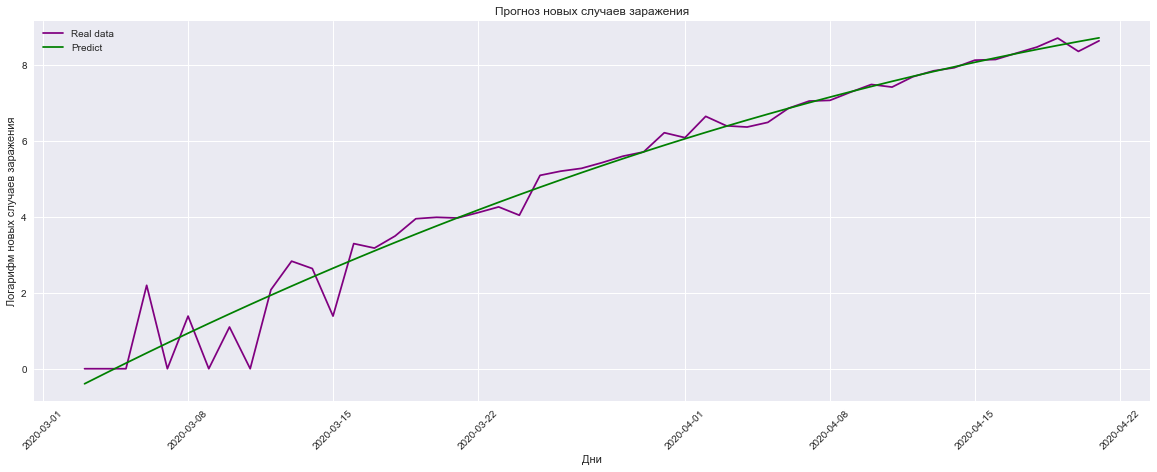

In [148]:
fig = plt.figure(figsize=(20, 7))
plt.plot(df.iloc[:train_size].index, train.new_log, color = "purple", label = 'Real data')
plt.plot(df.iloc[:train_size].index, model.predict(new_x), color = "green", label = 'Predict')

plt.xlabel("Дни")
plt.ylabel("Логарифм новых случаев заражения")
plt.title("Прогноз новых случаев заражения")
plt.xticks(rotation=45)
plt.legend();
plt.show()

b) Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. 

In [162]:
noise = 1 / np.var(train['total_log'].values - model.predict(new_x))
cur_mu, cur_sigma = calculate_aposterior(new_x, train['total_log'].values, noise)
cur_mu, cur_sigma

(array([ 0.86259344,  0.28594257, -0.0017185 ]),
 array([[ 3.82133266e-03, -3.02629927e-04,  4.99388954e-06],
        [-3.02629927e-04,  3.12727784e-05, -5.76356675e-07],
        [ 4.99388954e-06, -5.76356675e-07,  1.13020551e-08]]))

In [253]:
def myplot_sigmoid(mu, sigma, n=20, points=None):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    my_s = np.linspace(0, 100, 150) 
    my_y = []
    special_x = np.array([5, 10, 20, 50, 75, 90])
    sp_res = np.zeros((n, len(special_x)))
    sp_res = []
    for w in ws:
        sp_res.append(np.cumsum(np.exp(w[0] + w[1]*special_x + w[2]*special_x**2)))
        my_y.append(np.cumsum(np.exp(w[0] + w[1]*xs + w[2]*xs**2)))
        plt.plot(xs, my_y[-1], 'k-', linewidth=.7, alpha=.3)
        plt.xlim((0, 200))
        plt.ylim((0, 800000))
            
    plt.plot(x_train, train.total_cases, 'red', linewidth=3, label = 'Real data train')
    plt.plot(x_test, test.total_cases, 'yellow', linewidth=3, label = 'Real data test')
    plt.plot(xs, np.percentile(np.array(my_y), 90, axis=0), color='blue', lw=3, label='Pessimistic (90)')
    plt.plot(xs, np.percentile(np.array(my_y), 10, axis=0), color='green', lw=3, label='Optimistic(10)')   
    plt.legend();  
    
    plt.xlabel("Дни")
    plt.ylabel("Число заболевших")
    plt.title("Прогноз случаев заражения")
    plt.legend();
    return sp_res

c) Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики.

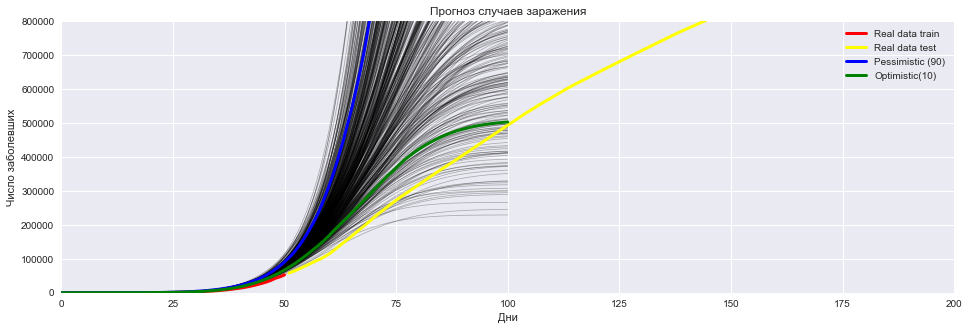

In [254]:
res = myplot_sigmoid(cur_mu, cur_sigma, n=500, points=None)

In [255]:
median_preds = np.mean(np.array(res), axis=0)

Прогноз числа случаев коронавируса в пессимистичном сценарии по дням:

In [260]:
list(zip(np.array([5, 10, 20, 50, 75, 90]),np.quantile(res, 0.9, axis=0)))

[(5, 2.388762605071258),
 (10, 10.313829777513957),
 (20, 83.53471864185633),
 (50, 8004.273306545483),
 (75, 78558.4006286694),
 (90, 207917.04732244386)]

Прогноз числа случаев коронавируса в оптимистичном сценарии по дням:

In [261]:
list(zip(np.array([5, 10, 20, 50, 75, 90]),np.quantile(res, 0.1, axis=0)))

[(5, 1.6442854840158663),
 (10, 7.795462867864234),
 (20, 65.69223581223076),
 (50, 4878.090671189443),
 (75, 12821.344232324687),
 (90, 15415.467355102872)]